## Cluster - Introdução

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# make_blobs: Generate isotropic Gaussian blobs for clustering 
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=50, n_features=2, centers=4, cluster_std=1.6)
 
# data[0] = valores dos pontos [x1, x2]
# data[1] = numero da gaussiana que deu origem ao ponto
data

(array([[ -2.75575346,  -9.10342328],
        [ -2.02063211,  -5.61074622],
        [ -0.56450926,   8.92057188],
        [  4.49998642,  10.53918114],
        [ -9.78955392,   2.13563064],
        [  1.93632804,  -3.21634563],
        [ -8.90641273,   2.96959435],
        [  3.88946055,  -4.32490305],
        [  1.51833164,  11.44296275],
        [ -2.80263093,  -9.78965765],
        [  1.35617444,  -2.77571346],
        [  1.92774507,   9.73373368],
        [ -2.27528443, -10.84002647],
        [  1.25141994,  -2.72536869],
        [ -8.82661216,   4.11443429],
        [-11.42528063,   3.62892534],
        [  2.65649207,  -4.46271306],
        [ -7.94652785,   2.20326412],
        [  1.12582198,  11.69896782],
        [  2.28769142,  -3.40895389],
        [ -2.77266325,  -8.45178984],
        [  4.65089916,   9.92985133],
        [  3.50051689,   9.25603365],
        [ -8.54377904,   0.19464976],
        [  1.10761384,  -3.95712128],
        [  3.41289955,   9.80315132],
        [-11

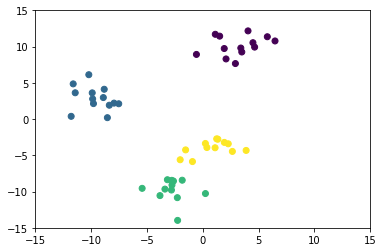

In [6]:
points = data[0]

# plotando os pontos gerados pelas gaussianas do make_blobs
plt.scatter(points[:,0], points[:,1], c=data[1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
# criando um objeto KMeans
k = 4 # numero de clusters
kmeans = KMeans(n_clusters=k) 

# "fitando" aos dados
kmeans.fit(points)

print(kmeans.cluster_centers_) # localizacao dos clusters

# clusters gerados pelo kmeans para cada ponto
y_km = kmeans.fit_predict(points)

[[-2.74019389 -9.79678319]
 [ 3.18561225 10.12244094]
 [-9.59246849  2.8487735 ]
 [ 0.8853876  -3.99039048]]


In [9]:
y_km

array([3, 0, 2, 2, 1, 0, 1, 0, 2, 3, 0, 2, 3, 0, 1, 1, 0, 1, 2, 0, 3, 2,
       2, 1, 0, 2, 1, 3, 0, 3, 1, 2, 3, 3, 1, 2, 0, 3, 1, 1, 1, 0, 0, 3,
       2, 3, 1, 2, 3, 2], dtype=int32)

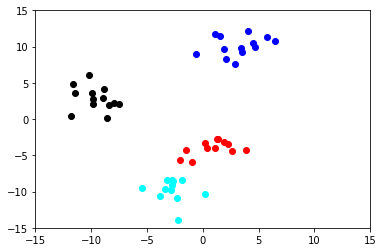

In [10]:
# plotando cada ponto com a cor relativa ao seu cluster
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.scatter(points[y_km == 0, 0], points[y_km == 0, 1], c='red')
plt.scatter(points[y_km == 1, 0], points[y_km == 1, 1], c='black')
plt.scatter(points[y_km == 2, 0], points[y_km == 2, 1], c='blue')
plt.scatter(points[y_km == 3, 0], points[y_km == 3, 1], c='cyan')

## Estratégias para definição do número de clusters

### Elbow

The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 𝐾. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

In [11]:
from yellowbrick.cluster import KElbowVisualizer

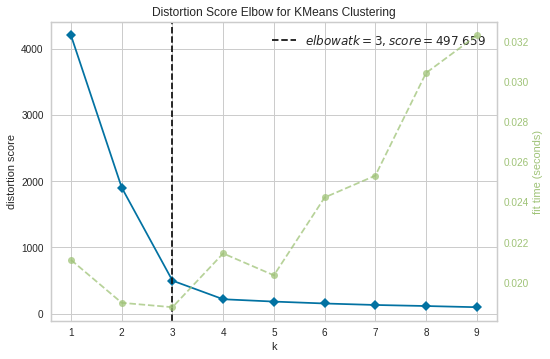

In [12]:
visualizer = KElbowVisualizer(kmeans, k=(1,10))

visualizer.fit(points)      
visualizer.show()

### Silhueta

O método da silhueta é utilizado para medir a qualidade do resultado de *clustering*. A ideia principal consiste em calcular para cada ponto $i$ um valor $s(i)$, definido como:

$$s(i) = \frac{b(i)-a(i)}{\max\{a(i), b(i)\}}$$

em que:

* $s(i) \in [-1,1]$;
* $a(i)$ representa a distância média de $i$ para os outros pontos do mesmo *cluster*;
* $b(i)$ é a distância mínima para um ponto que pertença a outro *cluster* que não o de $i$.

Se $s(i) < 0$, o ponto $i$ deveria estar em __outro *cluster*__. Se $s(i) > 0$, significa que seu *cluster* atual é a melhor escolha na configuração de *clusters* atual. Se $s(i) = 0$, o ponto $i$ é um ponto **borderline**.

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
k_vet = []
for k in [2,3,4,5,6,7,8,9]:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(points)
    centers = km.cluster_centers_

    score = silhouette_score(points, preds, metric='euclidean')
    k_vet.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 2, silhouette score is 0.5367871087389657)
For n_clusters = 3, silhouette score is 0.7163248347928584)
For n_clusters = 4, silhouette score is 0.7080975804827115)
For n_clusters = 5, silhouette score is 0.6000452917477678)
For n_clusters = 6, silhouette score is 0.5321097963923518)
For n_clusters = 7, silhouette score is 0.43072075739654475)
For n_clusters = 8, silhouette score is 0.43337081762193413)
For n_clusters = 9, silhouette score is 0.40972655771855915)


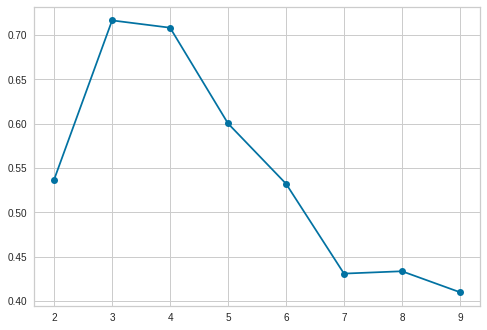

In [15]:
plt.plot([2,3,4,5,6,7,8,9], k_vet, marker='o')

## Kmeans / k-medoids

Os algoritmos KMeans e KMedoids utilizam a estratégia de agrupamento por particionamento, em que cada ponto $p$ pertence a exatamente um *cluster*.

Abaixo, segue um exemplo da aplicação do algoritmo KMeans usando o pacote sklearn. O parâmetro **init** do construtor determina o modo de escolha dos *centroids* iniciais. Eles podem ser:

* **k-means++:** método inteligente para escolher os pontos iniciais
* **random:** *centroids* aleatórios
* **ndarray:** array do numpy contendo os *centroids* (com as *features*)

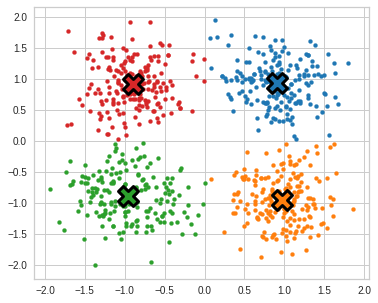

In [16]:
from sklearn.preprocessing import StandardScaler

# geração do conjunto de dados aleatórios
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4)
X = StandardScaler().fit_transform(X)

n_clusters = 4
kmeans = KMeans(n_clusters).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

unique_labels = set(labels)
colors = plt.cm.tab10(np.arange(n_clusters))


fig, ax = plt.subplots(figsize=(6, 5))

for c, color in zip(unique_labels, colors):
    cluster_mask = (labels == c)
    
    ax.scatter(X[cluster_mask][:, 0], X[cluster_mask][:, 1], s=4**2, color=color)
    ax.scatter(centroids[c][0], centroids[c][1], color=color, edgecolor='black', s=20**2, marker='X', lw=3)

## Dbscan

Os algoritmos KMeans e KMedoids são bons para encontrar *clusters* convexos e circulares, porém não obtêm bons resultados para problemas com *clusters* com formas arbitrárias e não convexas.

Um algoritmo mais adquado para esse tipo de situação é o **DBSCAN**. A ideia principal do algoritmo DBSCAN é agrupar pontos em uma mesma **região de alta densidade** em um *cluster*, de modo que pontos pertençam a *clusters* distintos se estiverem **separados por uma região de baixa densidade de dados**. No DBSCAN, nem todos os pontos são associados a um *cluster*, ao contrário do KMeans e KMedoids. Nesse caso, o ponto é considerado um __*outlier*__.

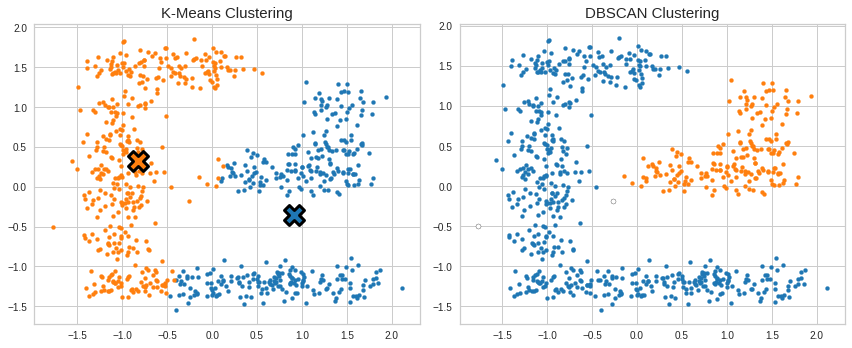

In [17]:
from sklearn.cluster import DBSCAN

# geração do conjunto de dados aleatórios
centers = [[-1, 2], [-1, 1.25], [-1, 0.5], [-1, 0], [-1, -0.5], [-1, -1.25], [-1, -2], 
           [-0.5, 2], [0, 2], [-0.5, -2], [0, -2], [0.5, -2], [0.8, -2], [1.3, -2],
           [0.2, 0], [0.7, 0], [1.2, 0], [1.2, 0.5], [1.2, 1.25]
          ]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.2, random_state=10)
X = StandardScaler().fit_transform(X)

kmeans_n_clusters = 2
kmeans = KMeans(kmeans_n_clusters).fit(X)

kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

kmeans_unique_labels = set(kmeans_labels)
kmeans_colors = plt.cm.tab10(np.arange(kmeans_n_clusters))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].set_title('K-Means Clustering', fontsize=15)
for c, color in zip(kmeans_unique_labels, kmeans_colors):
    cluster_mask = (kmeans_labels == c)

    ax[0].scatter(X[cluster_mask][:, 0], X[cluster_mask][:, 1], s=4**2, color=color)
    ax[0].scatter(kmeans_centroids[c][0], kmeans_centroids[c][1], color=color, edgecolor='black', s=20**2, marker='X', lw=3)


dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

dbscan_labels = dbscan.labels_
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_unique_labels = set(dbscan_labels)
dbscan_colors = plt.cm.tab10(np.arange(dbscan_n_clusters))

ax[1].set_title('DBSCAN Clustering', fontsize=15)

outlier_mask = (dbscan_labels == -1)
ax[1].scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], s=5**2, color='white', edgecolor='black')

for c, color in zip(dbscan_unique_labels, dbscan_colors):
    cluster_mask = (dbscan_labels == c)
    
    ax[1].scatter(X[cluster_mask][:, 0], X[cluster_mask][:, 1], s=4**2, color=color)


fig.tight_layout()

In [18]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

class MyDBSCAN:
    
    def __init__(self, eps, min_samples, dist_function=None):
        self.eps = eps
        self.min_samples = min_samples
        self.dist_function = dist_function if dist_function is not None else 'cityblock'
    
    
    def fit(self, X):
        d = squareform(pdist(X, 'cityblock'))
        self.neighborhood = [np.where(row < self.eps)[0] for row in d]
        for i, n in enumerate(self.neighborhood):
            self.neighborhood[i] = np.delete(n, np.where(self.neighborhood[i] == i)[0][0])
        
        
        self.labels = np.zeros(len(X)) -2 # unclassified
        
        cluster_id = 0
        for i, x in enumerate(X):
            if self.labels[i] == -2: # unclassified
                if self.expand_cluster(i, cluster_id):
                    cluster_id += 1


    def expand_cluster(self, i, cluster_id):
        seeds = list(self.neighborhood[i])
        if len(seeds) < self.min_samples:
            self.labels[i] = -1 # noise
            return False
        self.labels[i] = cluster_id
        for s in seeds:
            self.labels[s] = cluster_id
        
        while len(seeds) > 0:
            p = seeds.pop(0)
            result = self.neighborhood[p]
            if len(result) >= self.min_samples:
                for result_p in result:
                    if self.labels[result_p] < 0:
                        if self.labels[result_p] == -2:
                            seeds.append(result_p)
                        self.labels[result_p] = cluster_id
        return True

Utilizando o coeficiente da silhueta no exemplo da comparação entre KMeans e DBSCAN, temos o resultado mostrado abaixo:

Coeficiente de silhueta (KMeans): 0.418
Coeficiente de silhueta (DBSCAN): 0.019


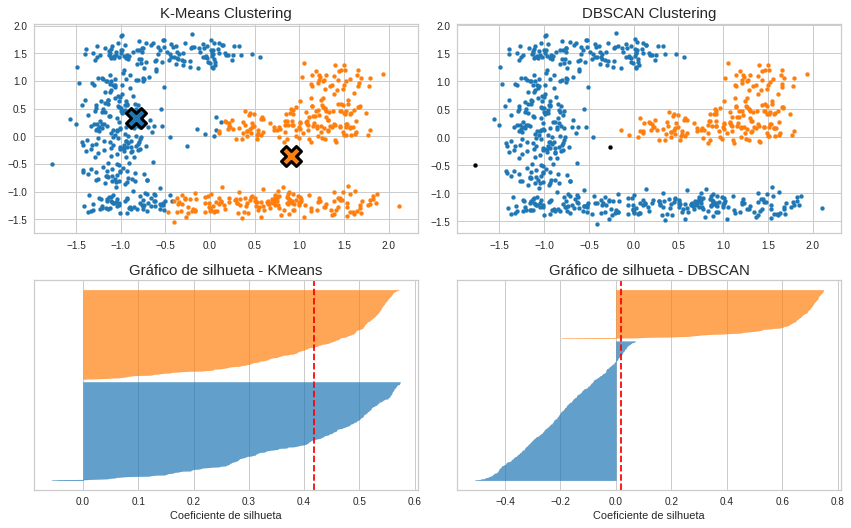

In [19]:
from sklearn.cluster import DBSCAN


# geração do conjunto de dados aleatórios
centers = [[-1, 2], [-1, 1.25], [-1, 0.5], [-1, 0], [-1, -0.5], [-1, -1.25], [-1, -2], 
           [-0.5, 2], [0, 2], [-0.5, -2], [0, -2], [0.5, -2], [0.8, -2], [1.3, -2],
           [0.2, 0], [0.7, 0], [1.2, 0], [1.2, 0.5], [1.2, 1.25]
          ]

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.2, random_state=10)
X = StandardScaler().fit_transform(X)

kmeans_n_clusters = 2
kmeans = KMeans(kmeans_n_clusters).fit(X)

kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

kmeans_unique_labels = set(kmeans_labels)
kmeans_colors = plt.cm.tab10(np.arange(kmeans_n_clusters))


fig, (ax_cluster, ax_silhouette) = plt.subplots(nrows=2, ncols=2, figsize=(12, 7.5))

ax_cluster[0].set_title('K-Means Clustering', fontsize=15)
for c, color in zip(kmeans_unique_labels, kmeans_colors):
    cluster_mask = (kmeans_labels == c)

    ax_cluster[0].scatter(X[cluster_mask][:, 0], X[cluster_mask][:, 1], s=4**2, color=color)
    ax_cluster[0].scatter(kmeans_centroids[c][0], kmeans_centroids[c][1], color=color, edgecolor='black', s=20**2, marker='X', lw=3)


dbscan = DBSCAN(eps=0.3, min_samples=8).fit(X)

dbscan_labels = dbscan.labels_
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_unique_labels = set(dbscan_labels)
dbscan_colors = plt.cm.tab10(np.arange(dbscan_n_clusters))

ax_cluster[1].set_title('DBSCAN Clustering', fontsize=15)

#noise
noise_mask = (dbscan_labels == -1)
ax_cluster[1].scatter(X[noise_mask][:, 0], X[noise_mask][:, 1], s=4**2, color='black')

for c, color in zip(dbscan_unique_labels, dbscan_colors):
    cluster_mask = (dbscan_labels == c)
    
    ax_cluster[1].scatter(X[cluster_mask][:, 0], X[cluster_mask][:, 1], s=4**2, color=color)


y_lower = 10

for n_clusters, labels, ax, method in zip([kmeans_n_clusters, dbscan_n_clusters], 
                              [kmeans_labels, dbscan_labels],
                              ax_silhouette,
                              ['KMeans', 'DBSCAN']):

    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab10(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
#         ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"Gráfico de silhueta - {method}", fontsize=15)
    ax.set_xlabel("Coeficiente de silhueta")
#     ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
#     ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

fig.tight_layout()

print('Coeficiente de silhueta (KMeans): {0:.3f}'.format(silhouette_score(X, kmeans_labels)))
print('Coeficiente de silhueta (DBSCAN): {0:.3f}'.format(silhouette_score(X, dbscan_labels)))